In [ ]:
## Notebook env: brian_script_env (R kernel)
## evaluating proliferation effects of selected guides

In [1]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Analysis

### Proliferation data 061824

In [2]:
## load in data

## proliferation data
prolif_assay_full = read.csv('/home/ssobti/projects/heterogeneity_brian/data/proliferation_assays_live_cell_dye/061824_phase_object_confluence_prolif.txt', sep = '\t', header = TRUE)
guide_names = c('RNF8-CRISPRi', 'MIS18A-CRIPSRi', 'RUVBL1-CRISPRi', 'VRK1-CRISPRi', 'HMGA1-CRISPRi', 'RNF8-CRISPRa', 'MIS18A-CRISPRa', 'NT', 'NTCA')
column_names = as.character(unlist(sapply(c('DMSO', 'taxol', 'dox', '5-FU'), function(x) paste(x, guide_names, sep=' '), simplify = FALSE)))
column_names_with_error = c(column_names, paste(column_names, 'std_error', sep = '_'))
colnames(prolif_assay_full)[!colnames(prolif_assay_full) %in% c('Elapsed', 'Date.Time')] = column_names_with_error
prolif_assay = prolif_assay_full[,!endsWith(colnames(prolif_assay_full), 'std_error') & !colnames(prolif_assay_full) %in% 'Date.Time']
prolif_assay

Elapsed,DMSO RNF8-CRISPRi,DMSO MIS18A-CRIPSRi,DMSO RUVBL1-CRISPRi,DMSO VRK1-CRISPRi,DMSO HMGA1-CRISPRi,DMSO RNF8-CRISPRa,DMSO MIS18A-CRISPRa,DMSO NT,DMSO NTCA,⋯,dox NTCA,5-FU RNF8-CRISPRi,5-FU MIS18A-CRIPSRi,5-FU RUVBL1-CRISPRi,5-FU VRK1-CRISPRi,5-FU HMGA1-CRISPRi,5-FU RNF8-CRISPRa,5-FU MIS18A-CRISPRa,5-FU NT,5-FU NTCA
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,26.27752,28.30010,9.803441,14.45152,7.928612,0.1585548,10.02522,41.27260,21.69406,⋯,25.71823,15.98059,25.92452,12.83720,21.52759,9.454405,7.919153,5.669475,24.77766,20.59345
3,26.86824,30.26302,9.905313,13.25762,7.496141,0.2146218,11.35549,47.54092,26.14763,⋯,25.73503,15.32520,24.53699,12.09048,19.92836,8.685858,7.851835,5.541480,25.32921,20.02452
6,29.50077,36.80077,11.197140,13.56000,7.467903,0.2297141,13.17024,53.48887,28.95764,⋯,25.72759,14.75936,25.60741,11.76946,19.39547,8.277254,7.475945,5.444455,28.06811,19.58725
9,31.71689,42.52547,12.983450,14.34661,7.504080,0.2101317,15.91097,57.51499,32.04586,⋯,25.98483,14.21043,27.26830,11.48596,19.13214,8.029461,7.310868,5.498662,30.59391,19.06750
12,33.05106,46.48316,14.006300,15.77713,7.469474,0.2471454,17.80658,62.15238,35.03783,⋯,25.96333,13.73433,29.28436,11.30217,19.04517,7.934553,7.350306,5.683577,32.36427,18.97260
15,34.45466,49.00421,14.481810,16.75781,7.616333,0.2498941,18.44730,65.99211,38.02457,⋯,25.78344,13.45213,30.51556,11.15699,19.02653,7.727221,7.284865,5.885069,34.65479,19.04729
18,34.69863,53.10871,14.602990,17.37129,7.829966,0.2592329,18.70581,69.31145,40.21129,⋯,26.50657,13.29032,31.07939,11.07564,18.95504,7.523561,7.342247,6.064863,35.15082,18.83424
21,37.48805,56.69860,15.160670,17.85151,8.047865,0.2445674,18.32267,71.41584,45.14990,⋯,27.11880,12.88550,31.03628,10.90028,18.57869,7.426467,7.392304,6.194582,35.07604,18.62112
24,39.15165,58.62832,15.120520,17.85149,8.210705,0.2403675,18.67700,74.44438,48.26829,⋯,27.56421,12.59825,30.59888,10.89361,18.33011,7.384485,7.176027,6.169314,34.95641,18.32293


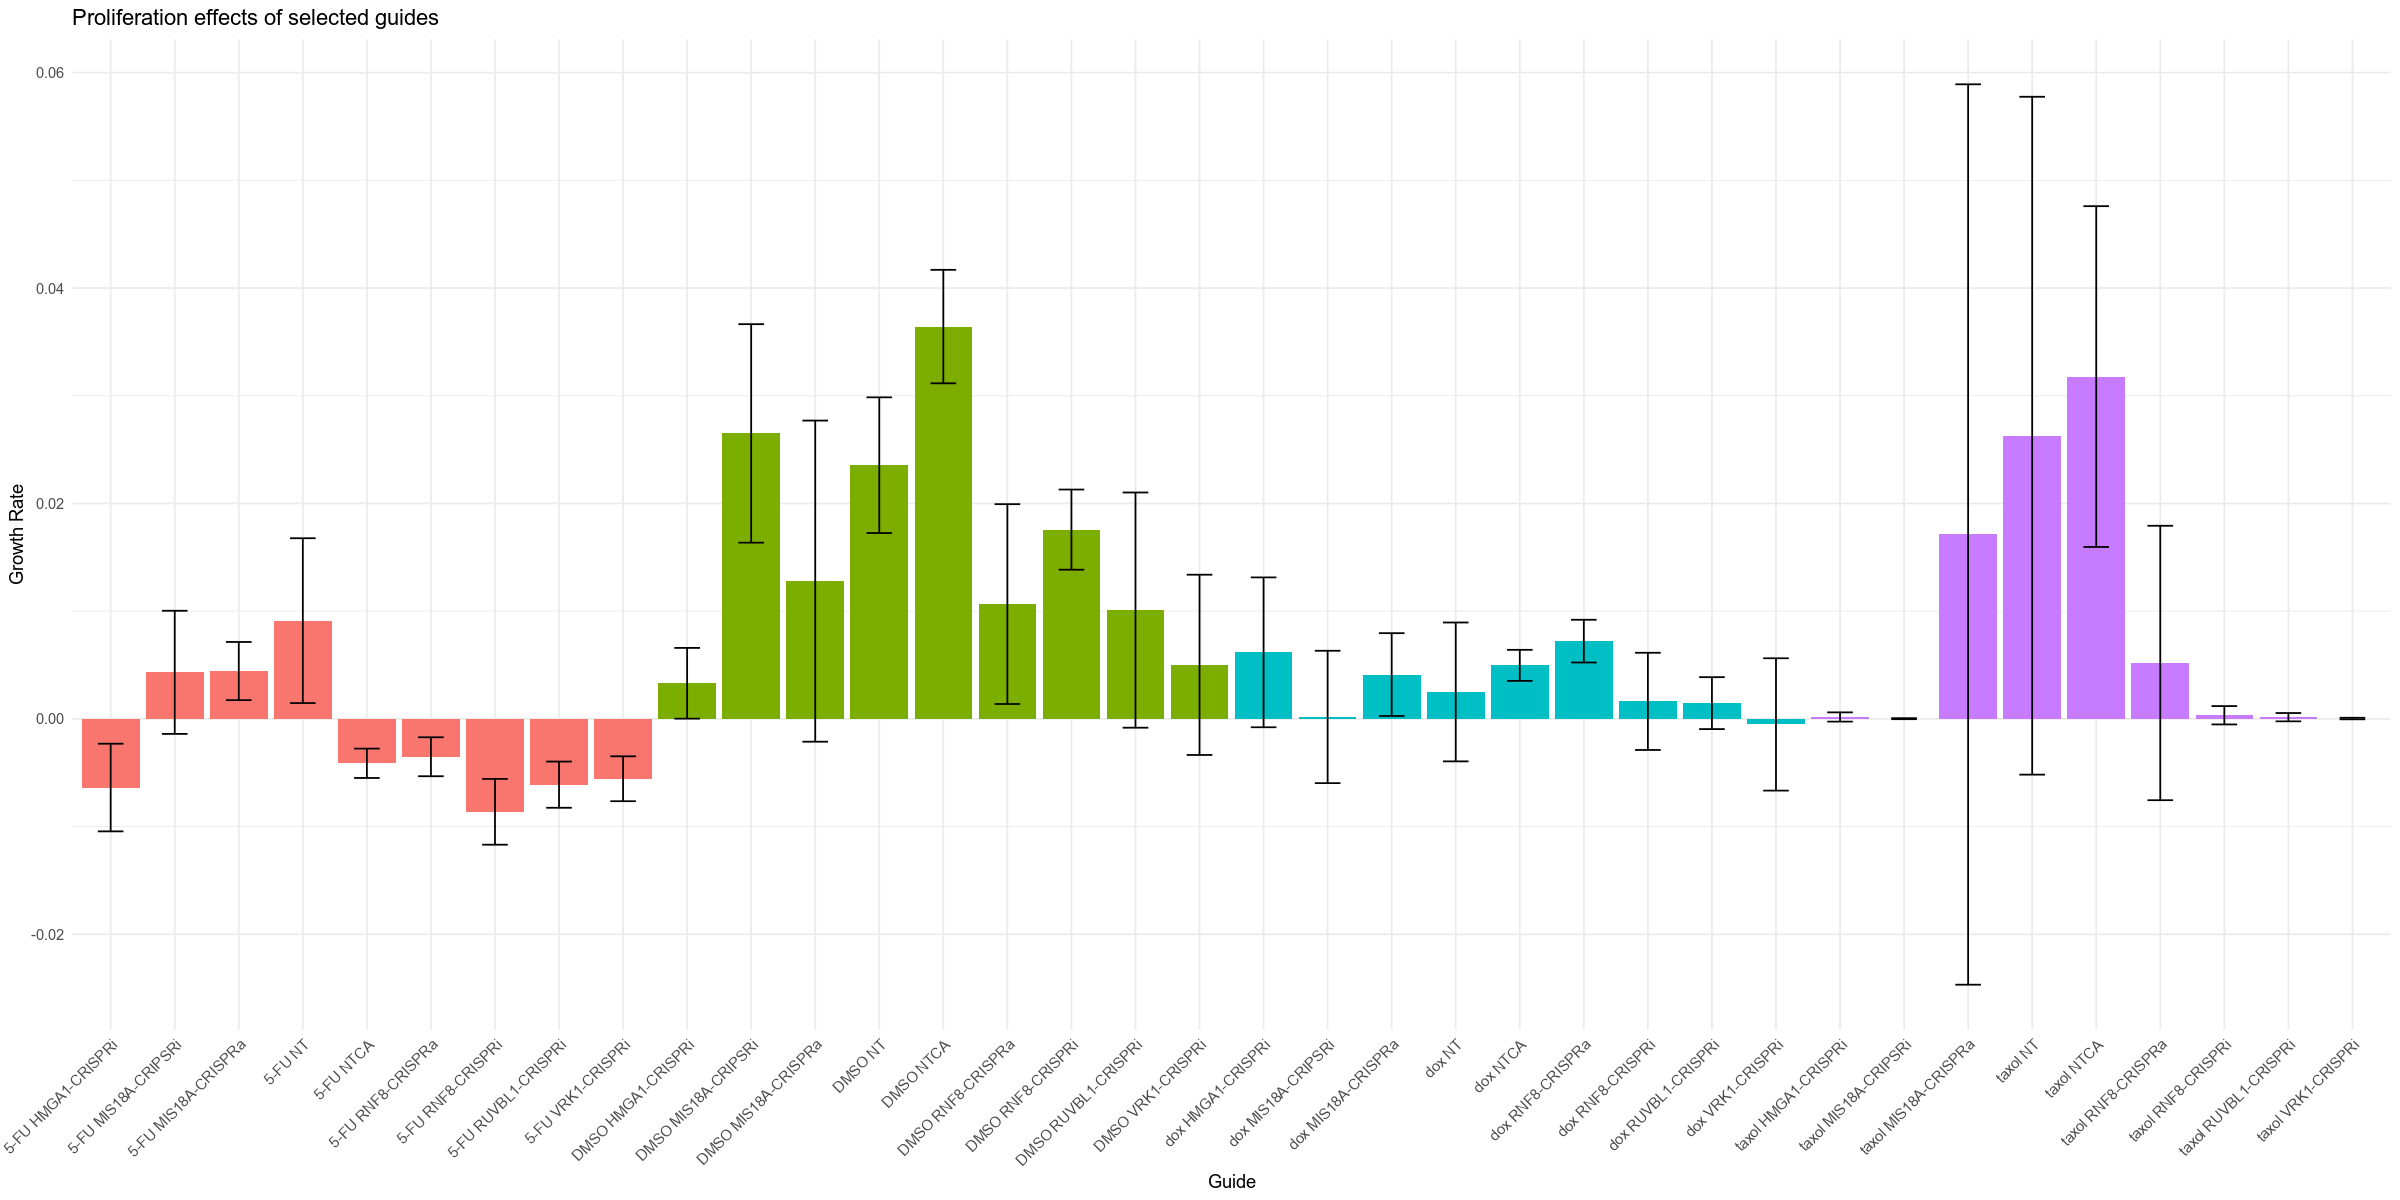

In [3]:
## proliferation graph
log2_prolif_assay = cbind('Elapsed hours' = prolif_assay$Elapsed, prolif_assay %>% select(-`Elapsed`) %>% log2())
slopes = vector()
errors = vector()

n = 1
for (i in 1:length(colnames(log2_prolif_assay))){
    if (i > 1){
        slopes[n] = as.numeric(coef(lm(log2_prolif_assay[,i] ~ log2_prolif_assay$`Elapsed hours`))[2])
        limits = abs(slopes[n] - as.numeric(confint(lm(log2_prolif_assay[,i] ~ log2_prolif_assay$`Elapsed hours`))[2,]))
        errors[n] = mean(abs(limits[2]) + abs(limits[1]))
        n = n + 1
    }
}

options(repr.plot.width=20, repr.plot.height=10)
barplot_df = data.frame('Guide' = column_names, 'Slope' = slopes, 'Error' = errors, drug = stringr::str_split(column_names, pattern = ' ', simplify = TRUE)[,1])
ggplot(barplot_df, aes(x = Guide, y = Slope, fill = drug)) + geom_bar(stat = 'identity') + geom_errorbar(aes(ymin = Slope - Error, ymax = Slope + Error), width = 0.4, position = position_dodge(0.9)) + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position = 'none') + labs(title = 'Proliferation effects of selected guides', y = 'Growth Rate', x = 'Guide')

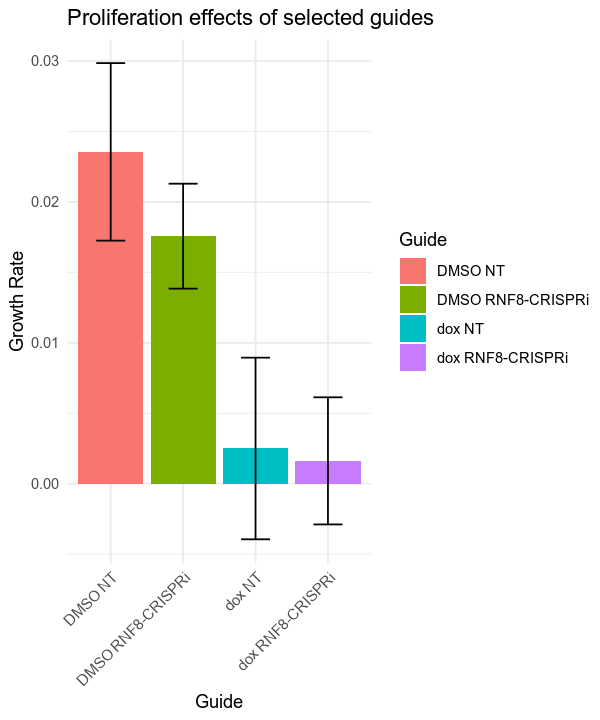

In [4]:
options(repr.plot.width=5, repr.plot.height=6)
barplot_df %>% filter(Guide %in% c('DMSO NT', 'DMSO RNF8-CRISPRi', 'dox NT','dox RNF8-CRISPRi')) %>%
    ggplot(aes(x = Guide, y = Slope, fill = Guide)) + geom_bar(stat = 'identity') + geom_errorbar(aes(ymin = Slope - Error, ymax = Slope + Error), width = 0.4, position = position_dodge(0.9)) + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + labs(title = 'Proliferation effects of selected guides', y = 'Growth Rate', x = 'Guide')

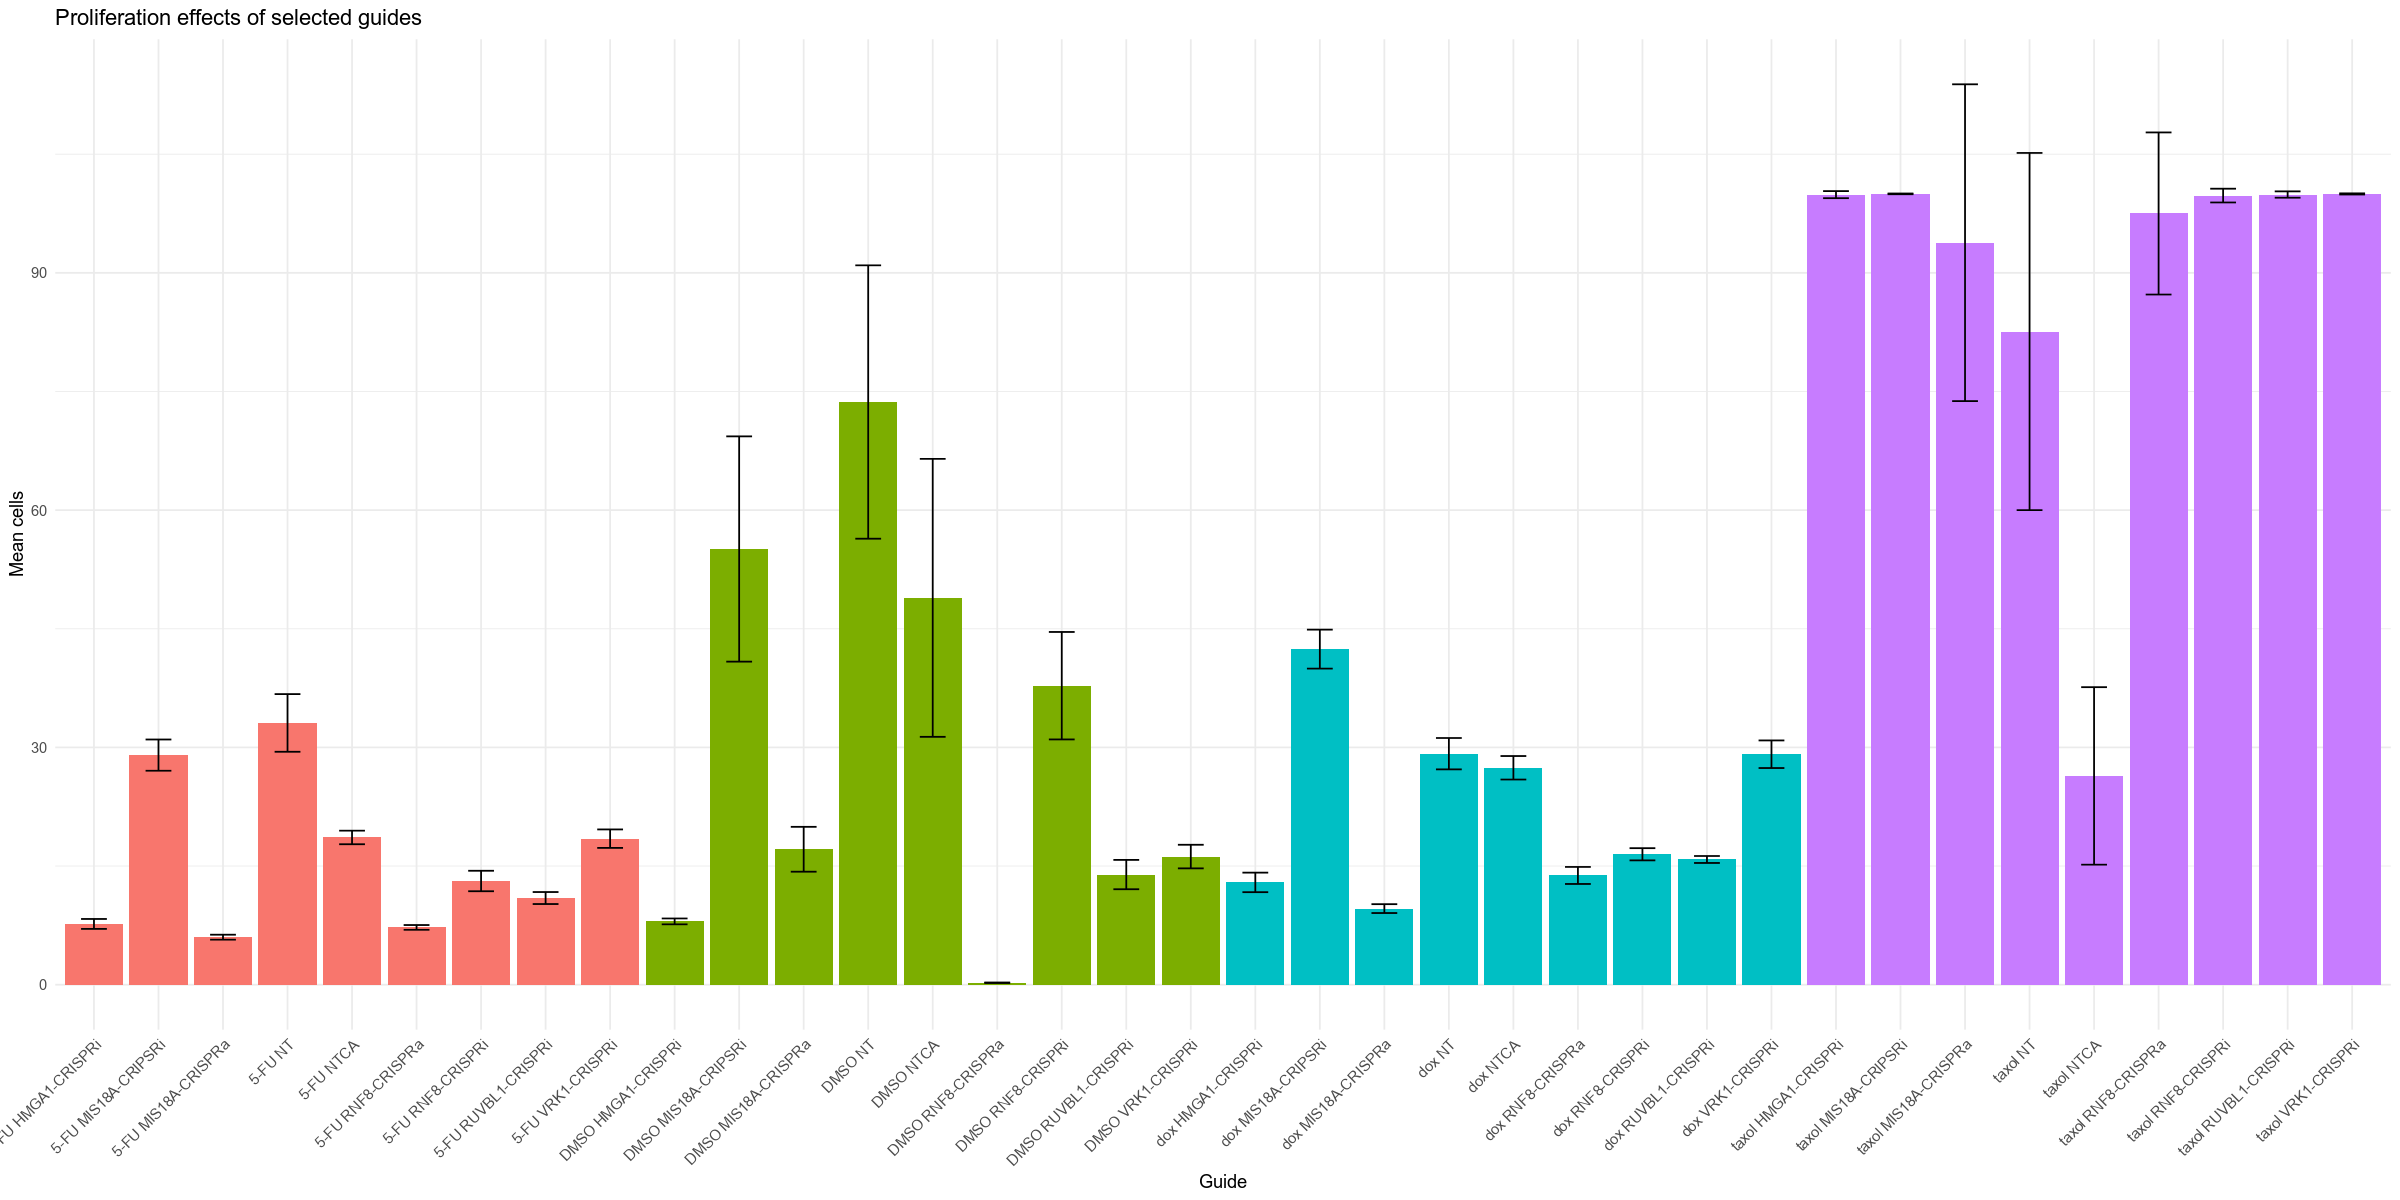

In [5]:
## can also do mean across time instead of growth rate
options(repr.plot.width=20, repr.plot.height=10)
df = data.frame(Guide = column_names, mean = apply(prolif_assay[,-1], mean, MARGIN = 2), sd = apply(prolif_assay[,-1], sd, MARGIN = 2), drug = stringr::str_split(column_names, pattern = ' ', simplify = TRUE)[,1])
ggplot(df, aes(x = Guide, y = mean, fill = drug)) + geom_bar(stat = 'identity') + geom_errorbar(aes(ymin = mean - sd, ymax = mean + sd), width = 0.4, position = position_dodge(0.9)) + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position = 'none') + labs(title = 'Proliferation effects of selected guides', y = 'Mean cells', x = 'Guide')

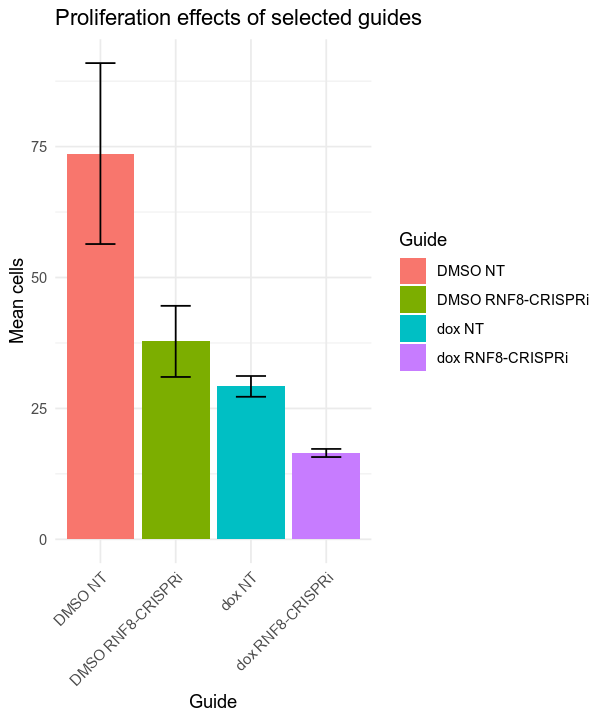

In [6]:
options(repr.plot.width=5, repr.plot.height=6)
df %>% filter(Guide %in% c('DMSO NT', 'dox NT', 'DMSO RNF8-CRISPRi','dox RNF8-CRISPRi')) %>%
    ggplot(aes(x = Guide, y = mean, fill = Guide)) + geom_bar(stat = 'identity') + geom_errorbar(aes(ymin = mean - sd, ymax = mean + sd), width = 0.4, position = position_dodge(0.9)) + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + labs(title = 'Proliferation effects of selected guides', y = 'Mean cells', x = 'Guide')

### Proliferation data 070124

In [7]:
## load in data

## proliferation data
prolif_assay_full = read.csv('/home/ssobti/projects/heterogeneity_brian/data/proliferation_assays_live_cell_dye/070124_phase_object_confluence_prolif.txt', sep = '\t', header = TRUE)
guide_names = c('RNF8-CRISPRi', 'MIS18A-CRIPSRi', 'RUVBL1-CRISPRi', 'VRK1-CRISPRi', 'HMGA1-CRISPRi', 'RNF8-CRISPRa', 'MIS18A-CRISPRa', 'NT', 'NTCA')
column_names = as.character(unlist(sapply(c('DMSO', 'taxol', 'dox', '5-FU'), function(x) paste(x, guide_names, sep=' '), simplify = FALSE)))
column_names_with_error = c(column_names, paste(column_names, 'std_error', sep = '_'))
colnames(prolif_assay_full)[!colnames(prolif_assay_full) %in% c('Elapsed', 'Date.Time')] = column_names_with_error
prolif_assay = prolif_assay_full[,!endsWith(colnames(prolif_assay_full), 'std_error') & !colnames(prolif_assay_full) %in% 'Date.Time']
prolif_assay

Warning message in colnames(prolif_assay_full)[!colnames(prolif_assay_full) %in% :
“number of items to replace is not a multiple of replacement length”


Elapsed,DMSO RNF8-CRISPRi,DMSO MIS18A-CRIPSRi,DMSO RUVBL1-CRISPRi,DMSO VRK1-CRISPRi,DMSO HMGA1-CRISPRi,DMSO RNF8-CRISPRa,DMSO MIS18A-CRISPRa,DMSO NT,DMSO NTCA,taxol RNF8-CRISPRi,taxol MIS18A-CRIPSRi,taxol RUVBL1-CRISPRi,taxol VRK1-CRISPRi,taxol HMGA1-CRISPRi,taxol RNF8-CRISPRa,taxol MIS18A-CRISPRa,taxol NT,taxol NTCA
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,6.925578,9.334469,10.47006,10.41577,11.80908,10.16018,10.87269,14.86284,10.30426,0.1728072,0.2511626,0.3893798,0.3842928,0.3991368,0.3506150,0.4701489,0.6731857,0.4933867
4,8.711919,11.786720,12.96818,13.05335,15.64191,11.95943,12.65890,16.58734,12.24789,0.2390348,0.2975114,0.4123627,0.4596827,0.5236891,0.4218613,0.5247085,0.6491875,0.5805575
8,10.694170,15.049110,15.41477,16.38934,20.04180,14.17949,14.27870,18.64061,15.28909,0.2810609,0.3950929,0.4931181,0.5572979,0.6813334,0.5032066,0.6438220,0.7810139,0.7603223
12,12.907120,18.263390,18.36293,19.91939,24.33232,16.18711,15.87280,21.11876,17.92638,0.3445592,0.4979485,0.5711557,0.7100822,0.7868519,0.5655332,0.7178802,0.8934228,0.8940544
16,14.558230,21.002530,20.67881,22.94973,27.69922,17.53801,16.72025,23.09976,19.82927,0.3791379,0.5735595,0.6397183,0.8690588,0.8771897,0.6053630,0.7355089,1.0210190,1.0148870
20,16.494900,24.233690,23.92634,27.10512,31.73247,19.49743,18.29481,26.61971,22.26227,0.4214238,0.6593461,0.8129895,1.0019260,1.0033080,0.7233104,0.8045071,1.1467700,1.1412120
24,18.262960,27.089690,26.92904,29.92303,34.37694,21.40889,19.93051,30.29319,24.45413,0.4420719,0.8317202,0.8896751,1.0302850,1.0688570,0.7808841,0.8835287,1.2510150,1.2367200
28,19.894870,29.411770,29.56668,32.75010,36.79589,23.52282,21.39870,32.81870,26.33067,0.4814745,0.8844086,0.9816623,1.0060220,1.0645010,0.8593584,0.9787528,1.3594940,1.3013960
32,22.458380,33.539310,33.83575,37.87413,42.23827,26.75962,24.20608,36.67704,30.07034,0.5531522,0.9075254,1.0805330,1.1945120,1.1729150,0.9951486,1.0828400,1.4872750,1.4976380


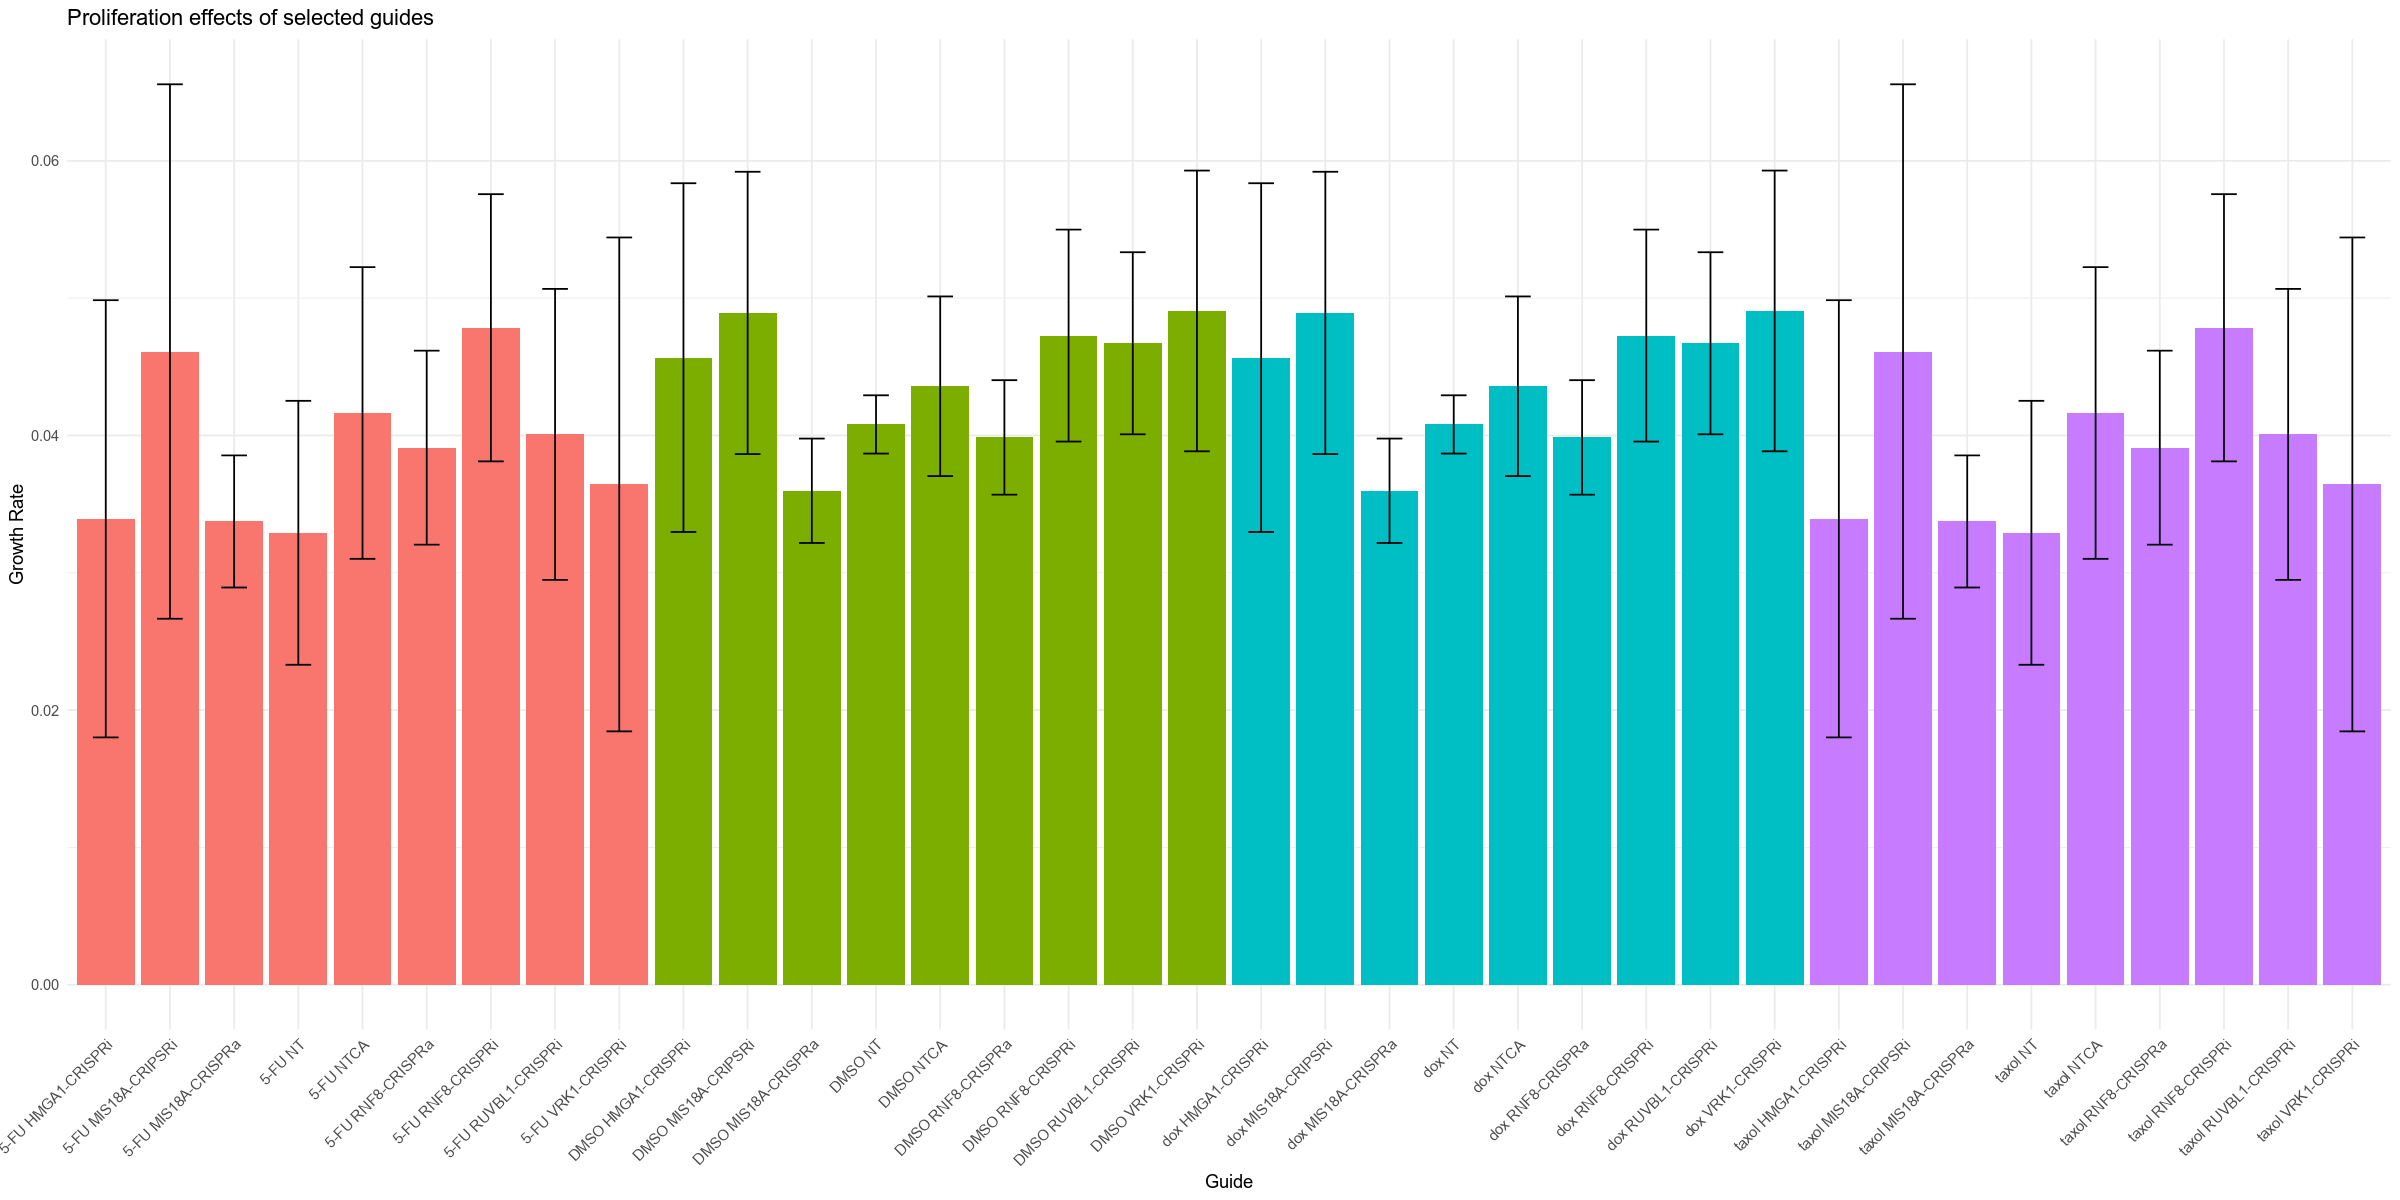

In [8]:
## proliferation graph
log2_prolif_assay = cbind('Elapsed hours' = prolif_assay$Elapsed, prolif_assay %>% select(-`Elapsed`) %>% log2())
slopes = vector()
errors = vector()

n = 1
for (i in 1:length(colnames(log2_prolif_assay))){
    if (i > 1){
        slopes[n] = as.numeric(coef(lm(log2_prolif_assay[,i] ~ log2_prolif_assay$`Elapsed hours`))[2])
        limits = abs(slopes[n] - as.numeric(confint(lm(log2_prolif_assay[,i] ~ log2_prolif_assay$`Elapsed hours`))[2,]))
        errors[n] = mean(abs(limits[2]) + abs(limits[1]))
        n = n + 1
    }
}

options(repr.plot.width=20, repr.plot.height=10)
barplot_df = data.frame('Guide' = column_names, 'Slope' = slopes, 'Error' = errors, drug = stringr::str_split(column_names, pattern = ' ', simplify = TRUE)[,1])
ggplot(barplot_df, aes(x = Guide, y = Slope, fill = drug)) + geom_bar(stat = 'identity') + geom_errorbar(aes(ymin = Slope - Error, ymax = Slope + Error), width = 0.4, position = position_dodge(0.9)) + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position = 'none') + labs(title = 'Proliferation effects of selected guides', y = 'Growth Rate', x = 'Guide')

### Death dye data

In [7]:
## select for RNF8 and MIS18A in 5-FU treatment to highlight
## RNF8 CRISPRa and MIS18A CRISPRi and CRISPRa at time point 48h (17)
## RNF8 CRISPRi at time point 9h (4)

In [8]:
## live/death data

live_death_assay_full = read.csv('/home/ssobti/projects/heterogeneity_brian/data/proliferation_assays_live_cell_dye/061824_NIR_object_count.txt', sep = '\t', header = TRUE)
guide_names = c('RNF8-CRISPRi', 'MIS18A-CRIPSRi', 'RUVBL1-CRISPRi', 'VRK1-CRISPRi', 'HMGA1-CRISPRi', 'RNF8-CRISPRa', 'MIS18A-CRISPRa', 'NT', 'NTCA')
column_names = as.character(unlist(sapply(c('DMSO', 'taxol', 'dox', '5-FU'), function(x) paste(x, guide_names, sep=' '), simplify = FALSE)))
column_names_with_error = c(column_names, paste(column_names, 'std_error', sep = '_'))
colnames(live_death_assay_full)[!colnames(live_death_assay_full) %in% c('Elapsed', 'Date.Time')] = column_names_with_error
live_death_assay = live_death_assay_full[,!endsWith(colnames(live_death_assay_full), 'std_error') & !colnames(live_death_assay_full) %in% 'Date.Time']
head(live_death_assay)

,Elapsed,DMSO RNF8-CRISPRi,DMSO MIS18A-CRIPSRi,DMSO RUVBL1-CRISPRi,DMSO VRK1-CRISPRi,DMSO HMGA1-CRISPRi,DMSO RNF8-CRISPRa,DMSO MIS18A-CRISPRa,DMSO NT,DMSO NTCA,⋯,dox NTCA,5-FU RNF8-CRISPRi,5-FU MIS18A-CRIPSRi,5-FU RUVBL1-CRISPRi,5-FU VRK1-CRISPRi,5-FU HMGA1-CRISPRi,5-FU RNF8-CRISPRa,5-FU MIS18A-CRISPRa,5-FU NT,5-FU NTCA
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,63.25,6.50,11.75,5.00,5.50,1.00,3.50,1.00,7.75,⋯,0,53.75,58.00,72.00,102.00,57.75,51.00,12.00,29.25,131.25
2,3,224.75,14.75,37.00,18.50,14.25,2.50,11.75,8.00,13.50,⋯,0,218.50,183.25,189.25,292.50,145.75,131.00,56.00,114.25,313.25
3,6,240.75,13.50,35.50,23.25,11.00,1.50,9.50,6.50,14.50,⋯,0,250.25,200.75,195.75,311.00,147.25,135.75,59.00,123.75,340.50
4,9,248.25,14.50,34.50,17.50,11.50,1.00,7.75,5.50,14.25,⋯,0,257.50,208.50,191.50,303.25,140.00,126.50,60.75,127.75,334.75
5,12,251.75,14.50,34.00,15.25,12.50,1.25,7.50,5.50,13.00,⋯,0,258.25,204.25,186.50,301.50,135.25,124.25,64.75,147.25,328.25
6,15,253.25,13.25,34.50,19.25,15.50,1.50,6.50,5.75,10.50,⋯,0,251.75,207.50,184.75,300.00,135.25,123.00,64.00,168.25,325.25


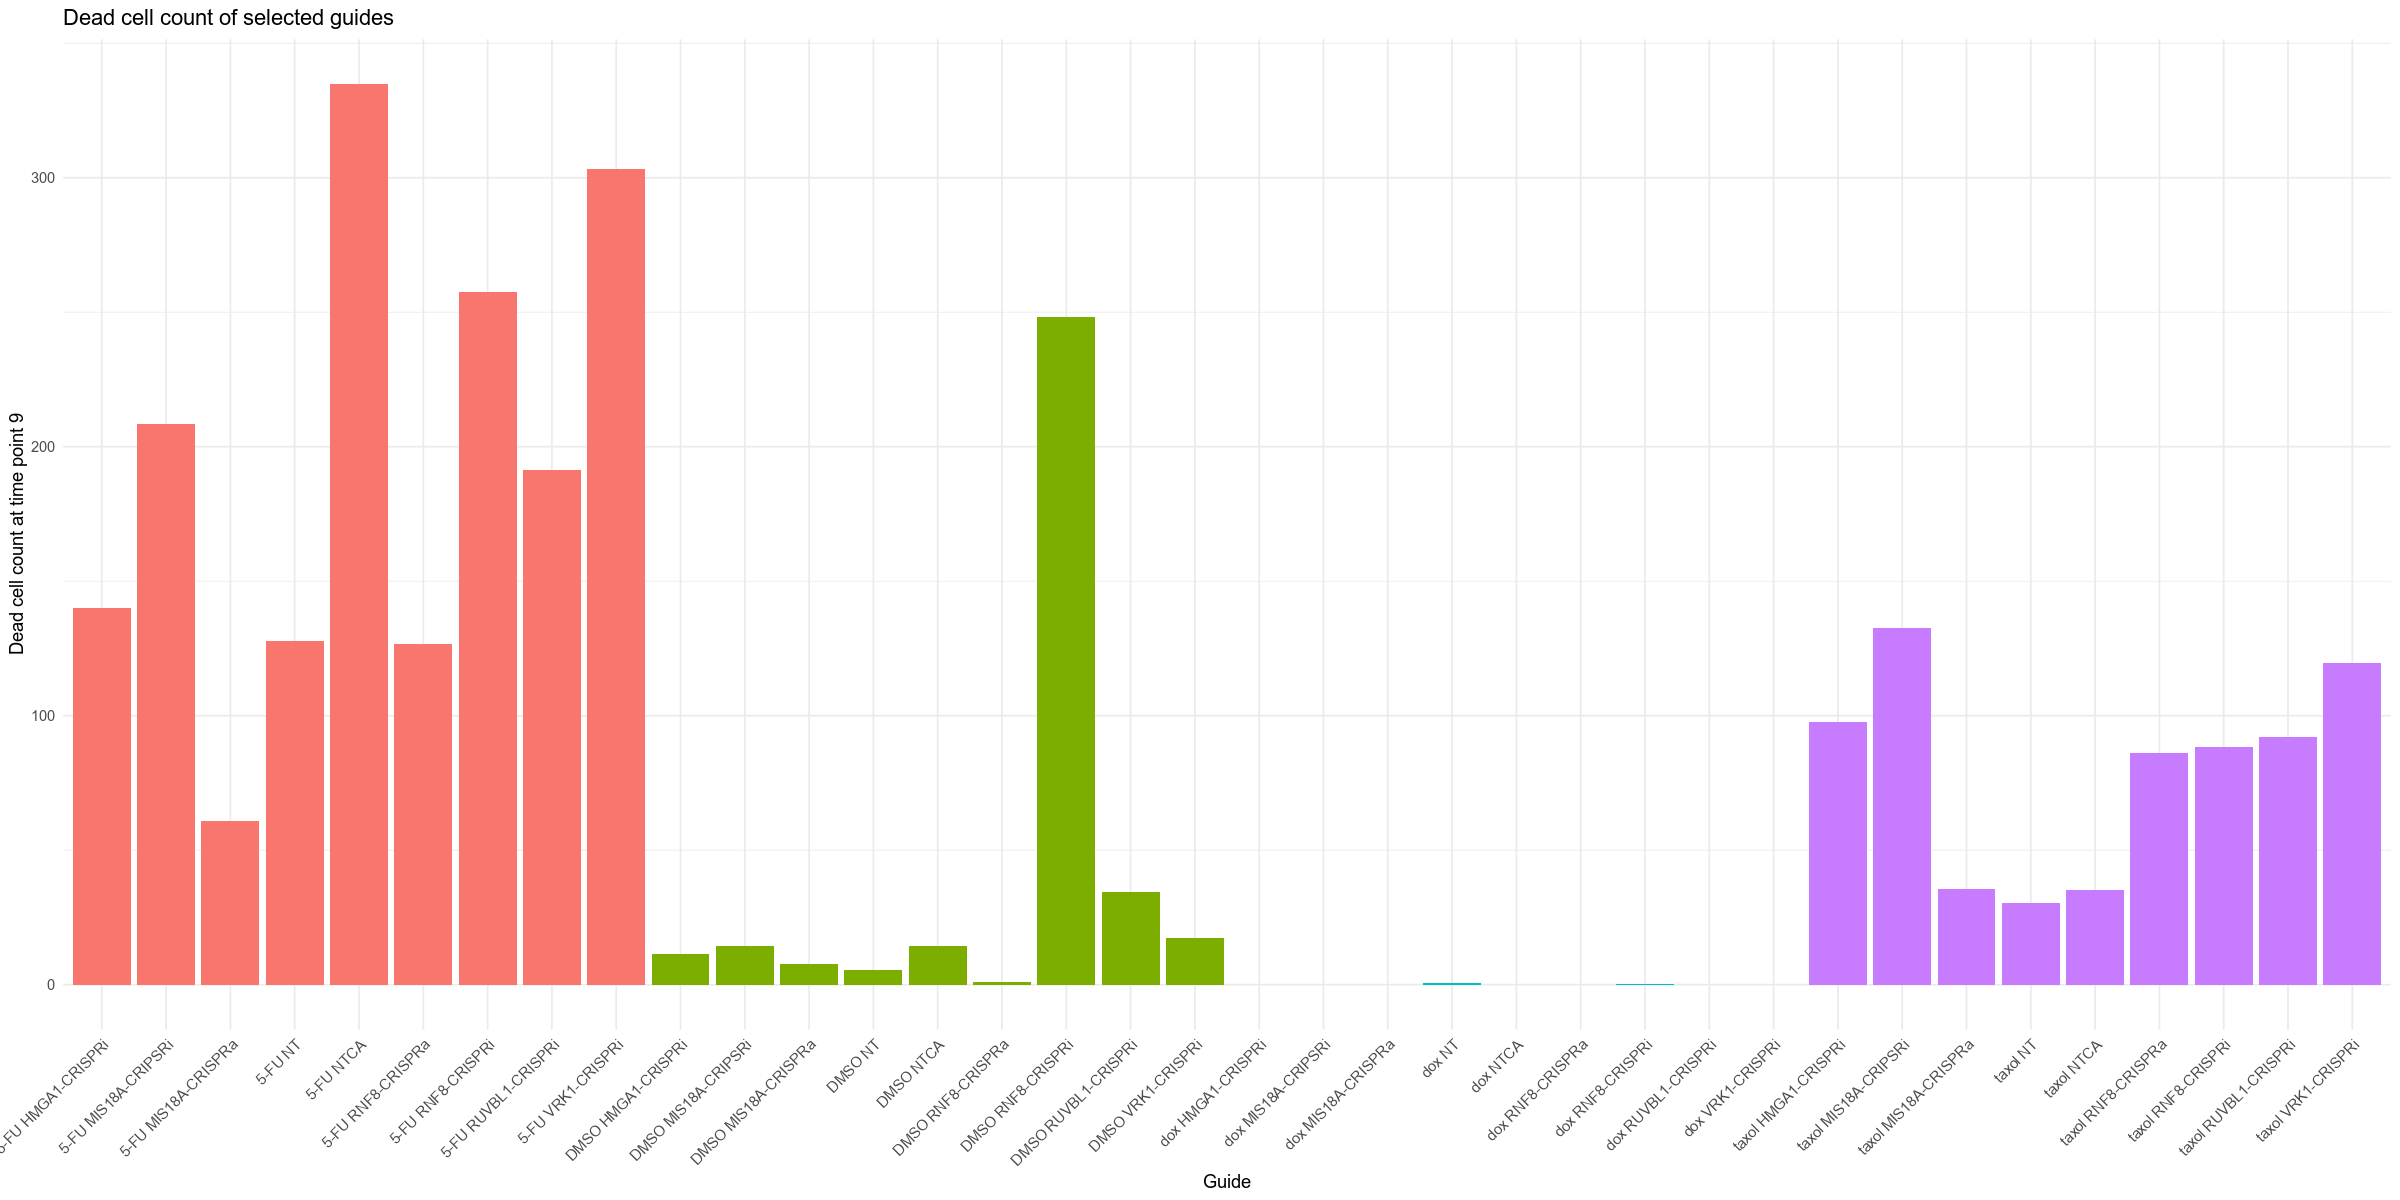

In [9]:
options(repr.plot.width=20, repr.plot.height=10)
time_point = 9
df = data.frame(Guide = colnames(live_death_assay)[-1], cell_count = as.numeric(live_death_assay[live_death_assay$Elapsed == time_point, !colnames(live_death_assay) %in% 'Elapsed']), drug = stringr::str_split(colnames(live_death_assay)[-1], pattern = ' ', simplify = TRUE)[,1])
ggplot(df, aes(x = Guide, y = cell_count, fill = drug)) + geom_bar(stat = 'identity') + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position = 'none') + labs(title = 'Dead cell count of selected guides', y = paste('Dead cell count at time point', time_point), x = 'Guide')

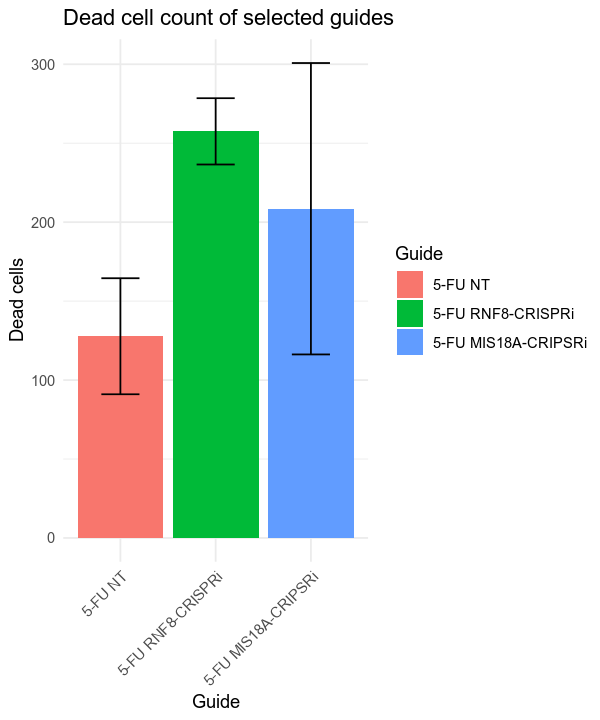

In [21]:
options(repr.plot.width=5, repr.plot.height=6)
live_death_assay_select = live_death_assay_full[live_death_assay_full$Elapsed == time_point, !colnames(live_death_assay_full) %in% c('Date.Time', 'Elapsed')]
live_death_assay_select = as.data.frame(t(live_death_assay_select))
df = data.frame(Guide = c('5-FU NT', '5-FU RNF8-CRISPRi', '5-FU MIS18A-CRIPSRi'), dead_cell_count = live_death_assay_select[c('5-FU NT', '5-FU RNF8-CRISPRi', '5-FU MIS18A-CRIPSRi'),], error = live_death_assay_select[c('5-FU NT_std_error', '5-FU RNF8-CRISPRi_std_error', '5-FU MIS18A-CRIPSRi_std_error'),])
df$Guide = factor(df$Guide, levels = c('5-FU NT', '5-FU RNF8-CRISPRi', '5-FU MIS18A-CRIPSRi'))
df %>% ggplot(aes(x = Guide, y = dead_cell_count, fill = Guide)) + geom_bar(stat = 'identity') + geom_errorbar(aes(ymin = dead_cell_count - error, ymax = dead_cell_count + error), width = 0.4, position = position_dodge(0.9)) + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + labs(title = 'Dead cell count of selected guides', y = 'Dead cells', x = 'Guide')

In [25]:
## p-vals
std_error = df$error
Stdevs = std_error*sqrt(2)
means = df$dead_cell_count
sd_pooled1 = sqrt(1*(Stdevs[1]^2 + Stdevs[2]^2) / 2)
sd_pooled2 = sqrt(1*(Stdevs[1]^2 + Stdevs[3]^2) / 2)
t1 = (means[2] - means[1])/(sd_pooled1 * sqrt(1/2 + 1/2))
t2 = (means[3] - means[1])/(sd_pooled2 * sqrt(1/2 + 1/2))
degrees_of_freedom = 2
pval1 = pt(t1, degrees_of_freedom, lower.tail = FALSE)
pval2 = pt(t2, degrees_of_freedom, lower.tail = FALSE)
pvals = c(pval1, pval2)
pvals
ttest_pvals_adjusted = p.adjust(pvals, method = 'bonferroni')
ttest_pvals_adjusted

[1] 0.04598463 0.25081046

[1] 0.09196926 0.50162092

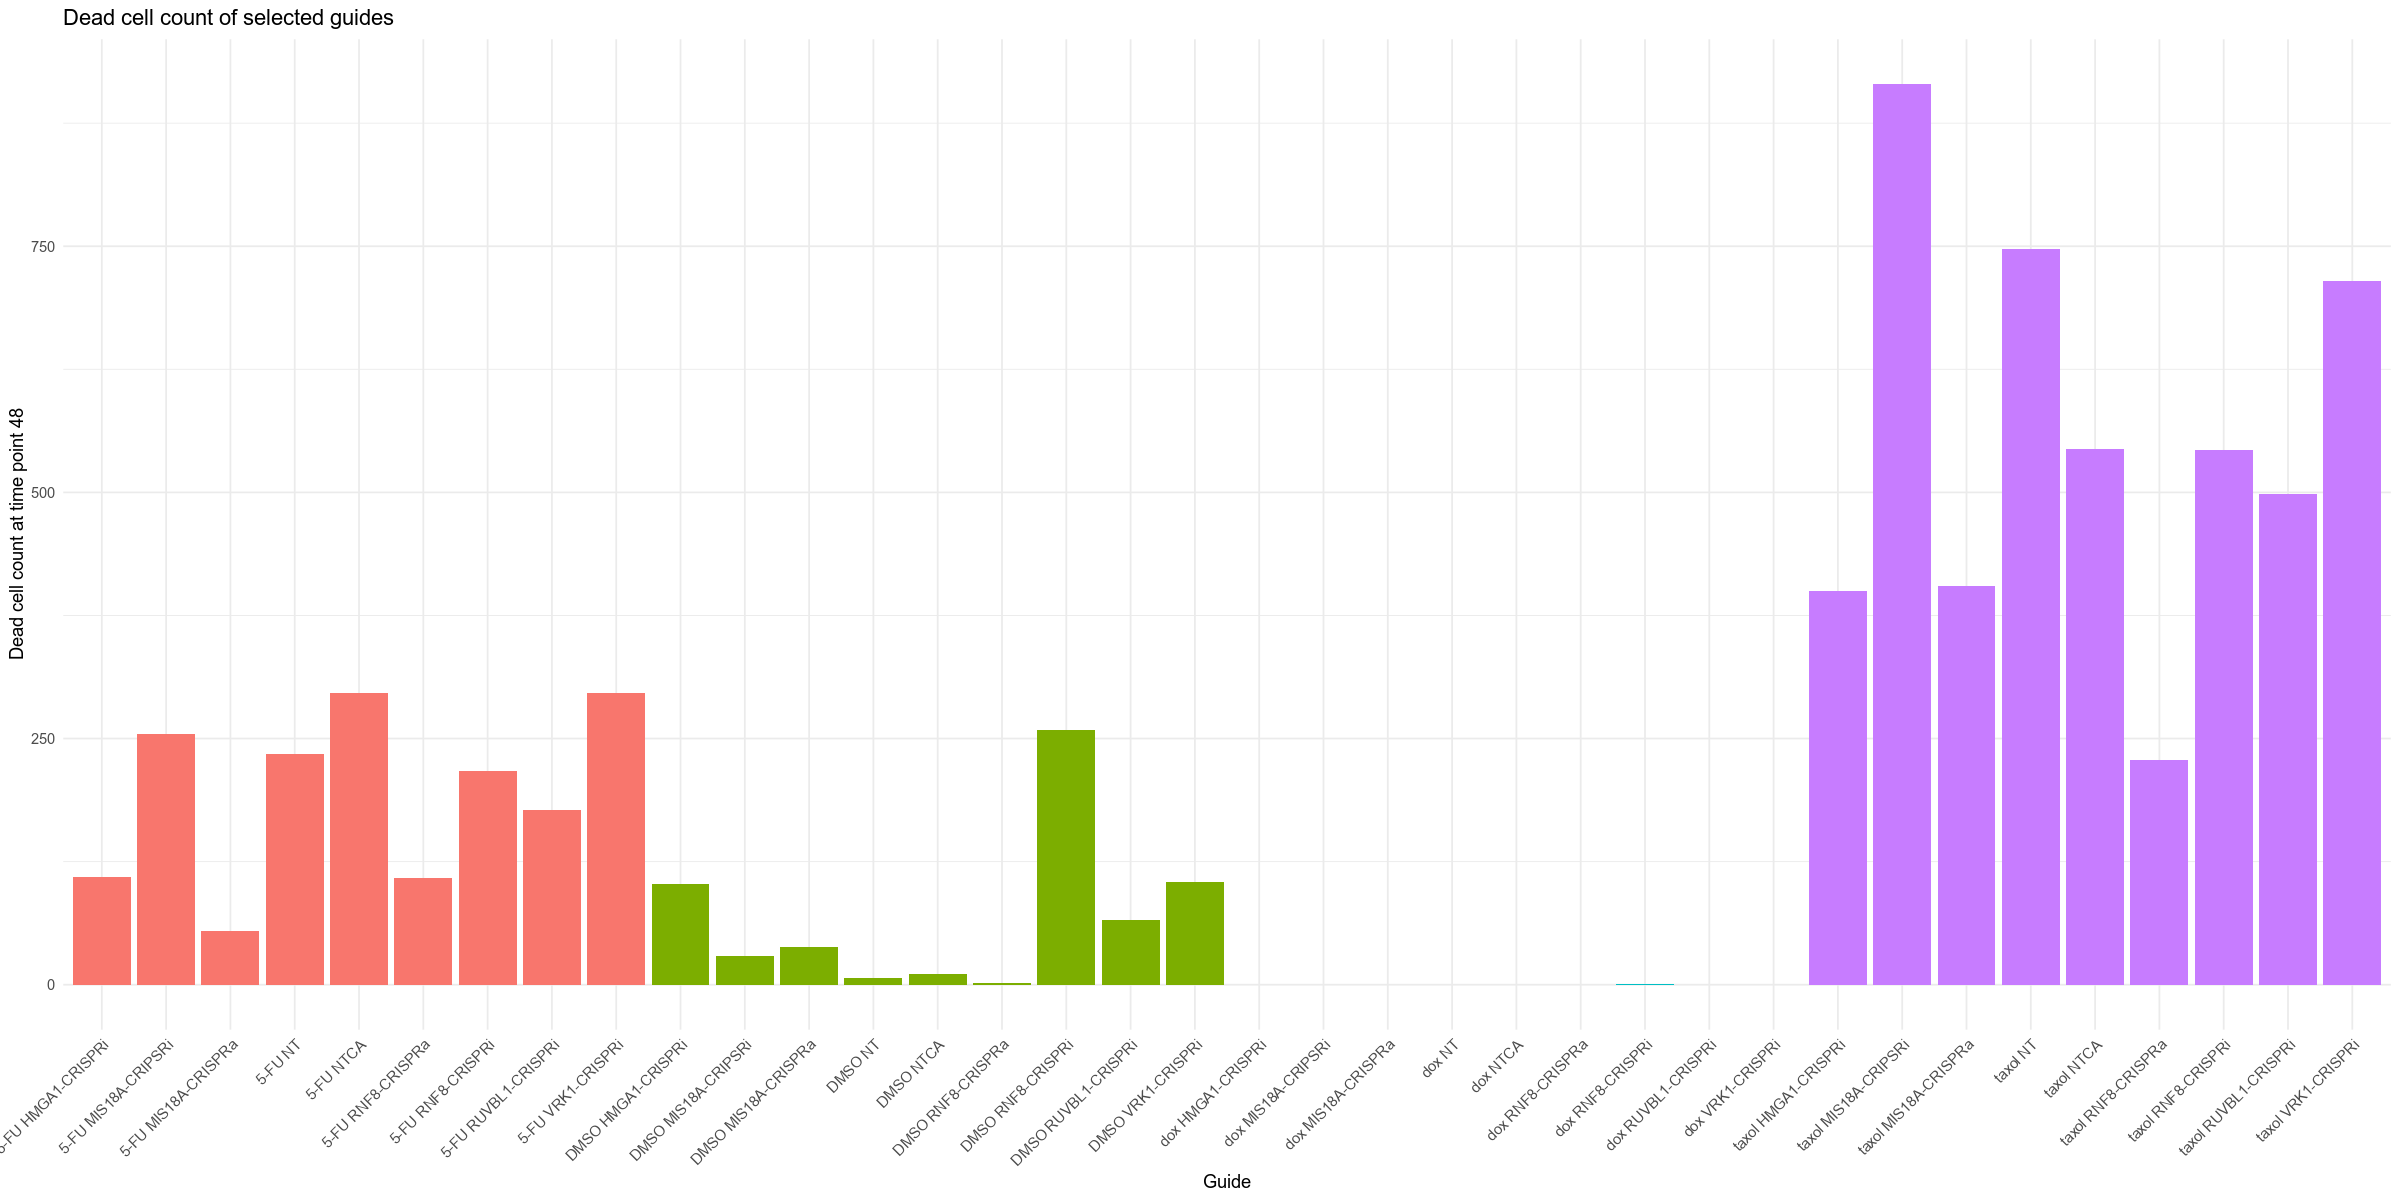

In [26]:
options(repr.plot.width=20, repr.plot.height=10)
time_point = 48
df = data.frame(Guide = colnames(live_death_assay)[-1], cell_count = as.numeric(live_death_assay[live_death_assay$Elapsed == time_point, !colnames(live_death_assay) %in% 'Elapsed']), drug = stringr::str_split(colnames(live_death_assay)[-1], pattern = ' ', simplify = TRUE)[,1])
ggplot(df, aes(x = Guide, y = cell_count, fill = drug)) + geom_bar(stat = 'identity') + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position = 'none') + labs(title = 'Dead cell count of selected guides', y = paste('Dead cell count at time point', time_point), x = 'Guide')

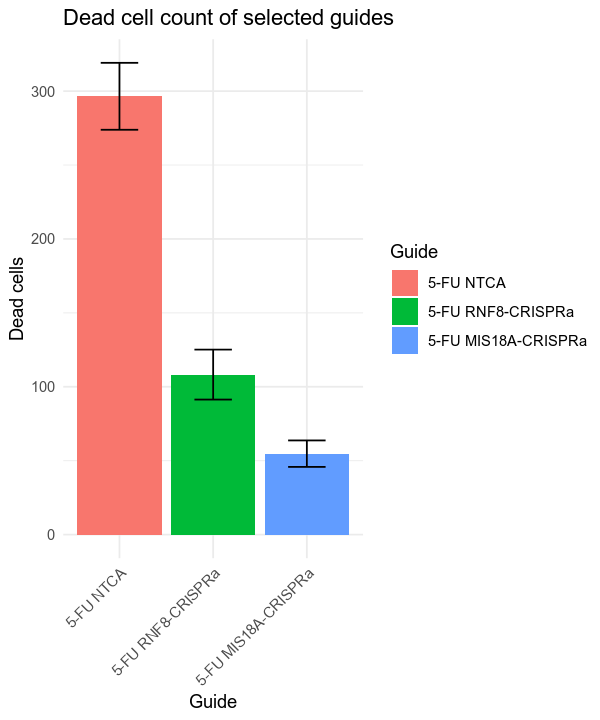

In [27]:
options(repr.plot.width=5, repr.plot.height=6)
live_death_assay_select = live_death_assay_full[live_death_assay_full$Elapsed == time_point, !colnames(live_death_assay_full) %in% c('Date.Time', 'Elapsed')]
live_death_assay_select = as.data.frame(t(live_death_assay_select))
df = data.frame(Guide = c('5-FU NTCA', '5-FU RNF8-CRISPRa', '5-FU MIS18A-CRISPRa'), dead_cell_count = live_death_assay_select[c('5-FU NTCA', '5-FU RNF8-CRISPRa', '5-FU MIS18A-CRISPRa'),], error = live_death_assay_select[c('5-FU NTCA_std_error', '5-FU RNF8-CRISPRa_std_error', '5-FU MIS18A-CRISPRa_std_error'),])
df$Guide = factor(df$Guide, levels = c('5-FU NTCA', '5-FU RNF8-CRISPRa', '5-FU MIS18A-CRISPRa'))
df %>% ggplot(aes(x = Guide, y = dead_cell_count, fill = Guide)) + geom_bar(stat = 'identity') + geom_errorbar(aes(ymin = dead_cell_count - error, ymax = dead_cell_count + error), width = 0.4, position = position_dodge(0.9)) + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + labs(title = 'Dead cell count of selected guides', y = 'Dead cells', x = 'Guide')

In [30]:
## p-vals
std_error = df$error
Stdevs = std_error*sqrt(2)
means = df$dead_cell_count
sd_pooled1 = sqrt(1*(Stdevs[1]^2 + Stdevs[2]^2) / 2)
sd_pooled2 = sqrt(1*(Stdevs[1]^2 + Stdevs[3]^2) / 2)
t1 = (means[2] - means[1])/(sd_pooled1 * sqrt(1/2 + 1/2))
t2 = (means[3] - means[1])/(sd_pooled2 * sqrt(1/2 + 1/2))
degrees_of_freedom = 2
pval1 = pt(t1, degrees_of_freedom, lower.tail = TRUE)
pval2 = pt(t2, degrees_of_freedom, lower.tail = TRUE)
pvals = c(pval1, pval2)
pvals
ttest_pvals_adjusted = p.adjust(pvals, method = 'bonferroni')
ttest_pvals_adjusted

[1] 0.01089443 0.00499444

[1] 0.021788869 0.009988881

In [17]:
## death rate graph
log2_live_death_assay = cbind('Elapsed hours' = live_death_assay$Elapsed, live_death_assay %>% select(-`Elapsed`) %>% log2())
slopes = vector()
errors = vector()
log2_live_death_assay_select = log2_live_death_assay[, startsWith(colnames(log2_live_death_assay), '5-FU') | colnames(log2_live_death_assay) == 'Elapsed hours']

n = 1
for (i in 1:length(colnames(log2_live_death_assay_select))){
    if (i > 1){
        slopes[n] = as.numeric(coef(lm(log2_live_death_assay_select[,i] ~ log2_live_death_assay_select$`Elapsed hours`))[2])
        limits = abs(slopes[n] - as.numeric(confint(lm(log2_live_death_assay_select[,i] ~ log2_live_death_assay_select$`Elapsed hours`))[2,]))
        errors[n] = mean(abs(limits[2]) + abs(limits[1]))
        n = n + 1
    }
}

options(repr.plot.width=20, repr.plot.height=10)
barplot_df = data.frame('Guide' = column_names, 'Slope' = slopes, 'Error' = errors, drug = stringr::str_split(column_names, pattern = ' ', simplify = TRUE)[,1])
ggplot(barplot_df, aes(x = Guide, y = Slope, fill = drug)) + geom_bar(stat = 'identity') + geom_errorbar(aes(ymin = Slope - Error, ymax = Slope + Error), width = 0.4, position = position_dodge(0.9)) + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position = 'none') + labs(title = 'Death rate of selected guides', y = 'Death Rate', x = 'Guide')

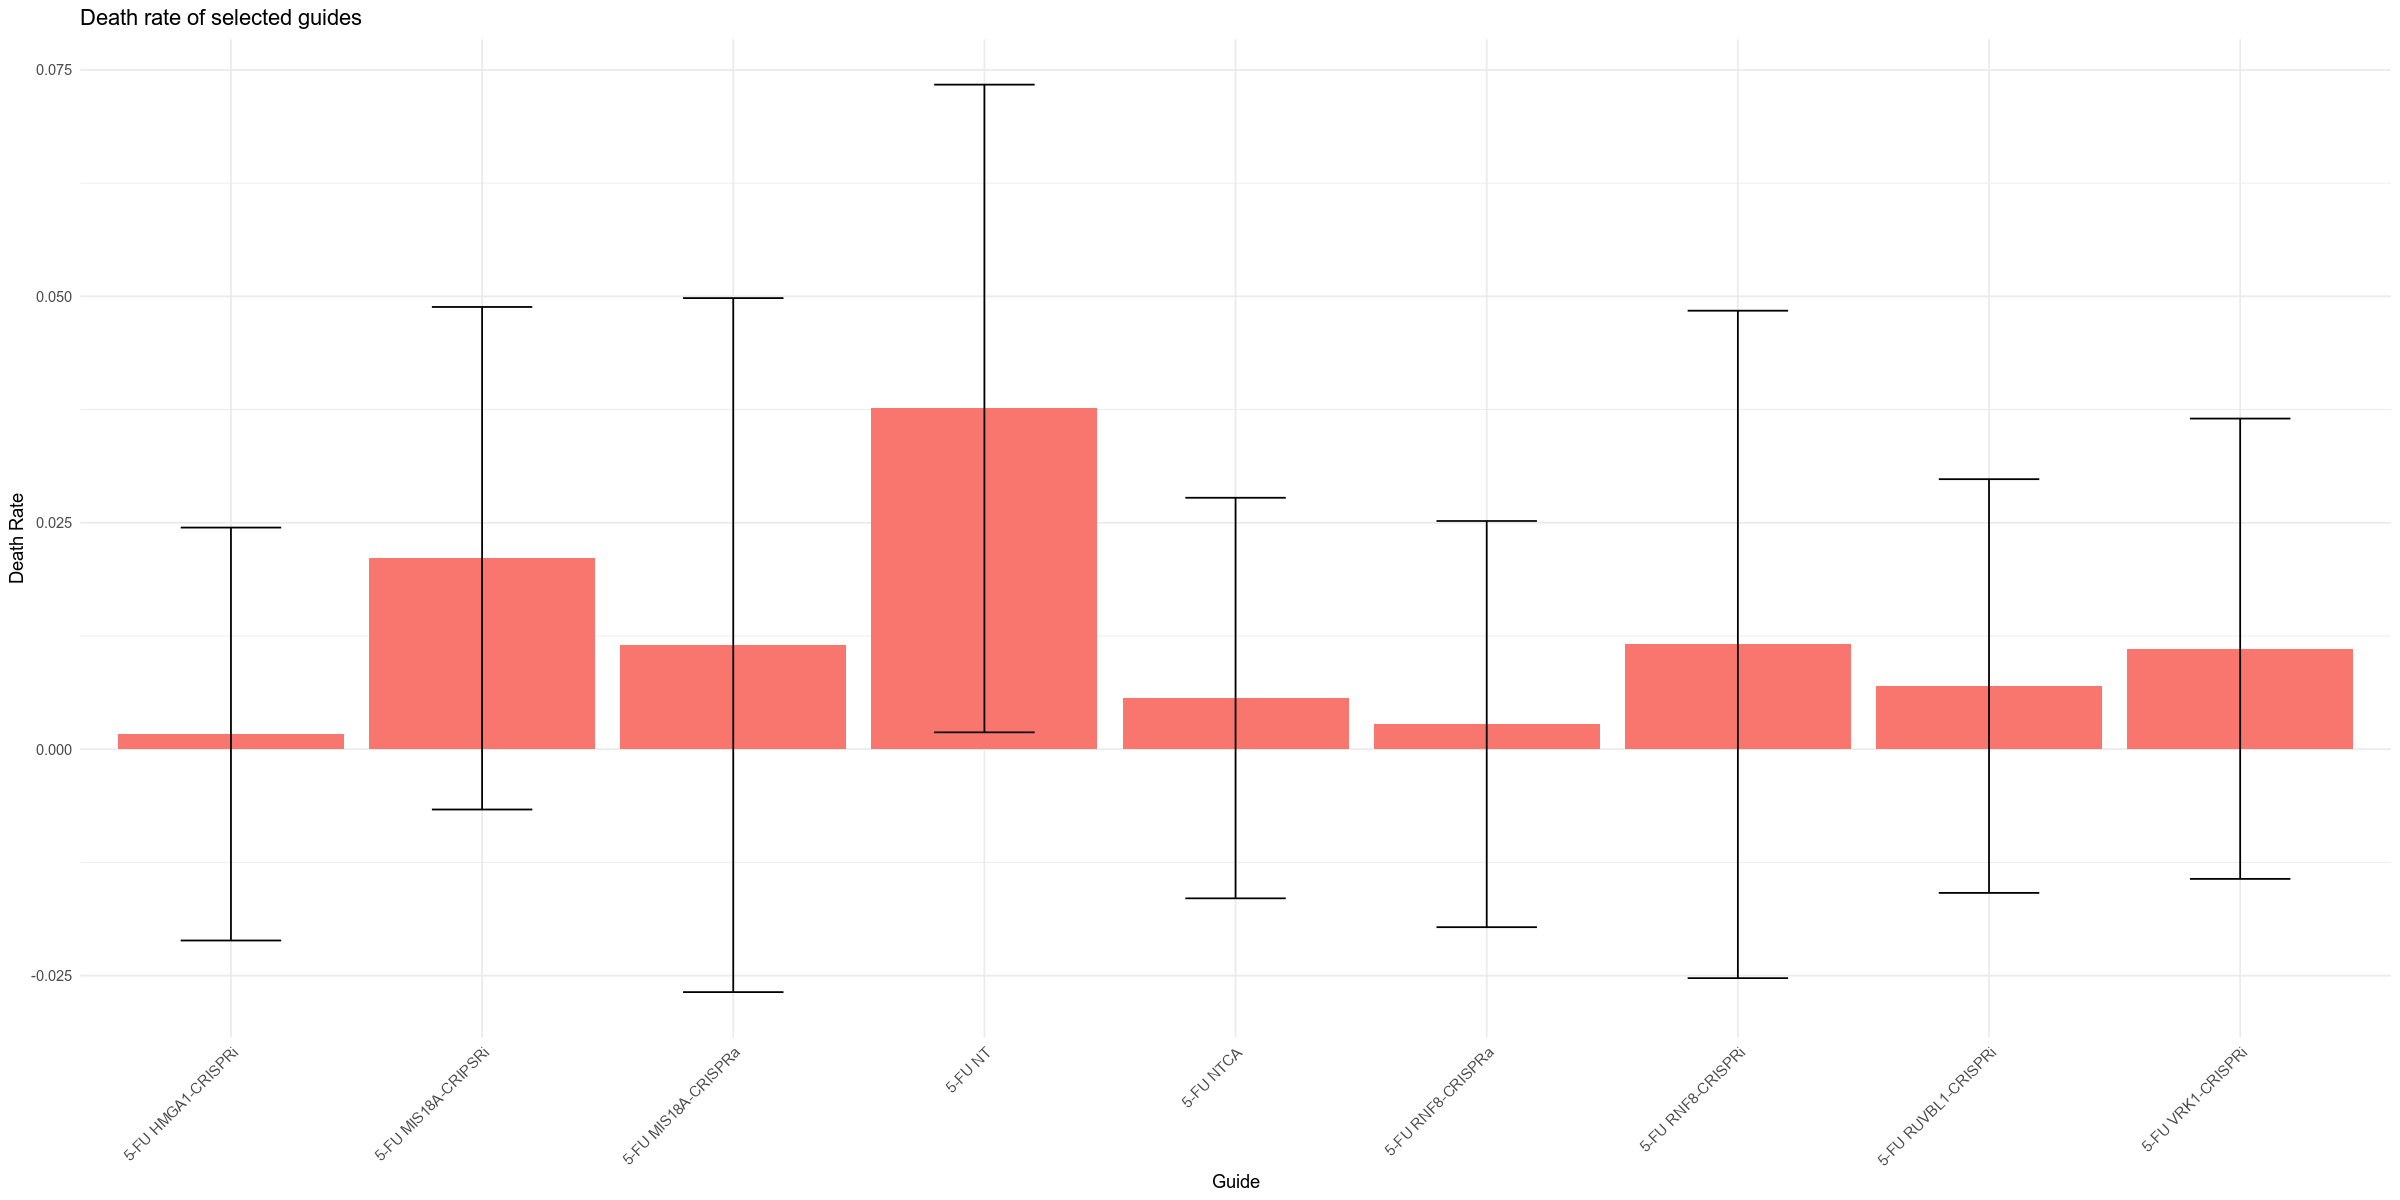

In [21]:
options(repr.plot.width=20, repr.plot.height=10)
barplot_df = data.frame('Guide' = colnames(log2_live_death_assay_select)[-1], 'Slope' = slopes, 'Error' = errors, drug = stringr::str_split(colnames(log2_live_death_assay_select)[-1], pattern = ' ', simplify = TRUE)[,1])
ggplot(barplot_df, aes(x = Guide, y = Slope, fill = drug)) + geom_bar(stat = 'identity') + geom_errorbar(aes(ymin = Slope - Error, ymax = Slope + Error), width = 0.4, position = position_dodge(0.9)) + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position = 'none') + labs(title = 'Death rate of selected guides', y = 'Death Rate', x = 'Guide')